# ANALYZE STRUCTURE OF OSCILLATORS

# Preliminaries

In [64]:
import collections
import os
import numpy as np
import SBMLDiagrams as sd
import pandas as pd
from sirn.network_collection import NetworkCollection
import sirn.constants as cn
import tellurium as te
from typing import List
import matplotlib.pyplot as plt

# Helpers

In [48]:
OSCILLATOR_PROJECT_DIR = "/Users/jlheller/home/Technical/repos/OscillatorDatabase"
STRUCTURALLY_IDENTICAL_FILES = "bestmodel_ZKtQg5szoAUk---bestmodel_lTR7BUrpcTAy---bestmodel_Y4fPEi7PvO0w---bestmodel_yhI1I1IxoudY---bestmodel_wCBCoNxIRqb0---bestmodel_xTKG3iamyD4S---bestmodel_ZqsnhNDEiUsx".split("---")
IDENTITY_STRONG_PATH_DCT = {d: os.path.join(cn.DATA_DIR, "strong_identity_1B", "identity_" + d + ".txt") for d in cn.OSCILLATOR_DIRS}
IDENTITY_WEAK_PATH_DCT = {d: os.path.join(cn.DATA_DIR, "weak_identity_1B", "identity_" + d + ".txt") for d in cn.OSCILLATOR_DIRS}
IDENTITY_WEAK_PATH_DCT

{'Oscillators_May_28_2024_8898': '/Users/jlheller/home/Technical/repos/sirn/data/weak_identity_1B/identity_Oscillators_May_28_2024_8898.txt',
 'Oscillators_June_9_2024_14948': '/Users/jlheller/home/Technical/repos/sirn/data/weak_identity_1B/identity_Oscillators_June_9_2024_14948.txt',
 'Oscillators_June_10_A_11515': '/Users/jlheller/home/Technical/repos/sirn/data/weak_identity_1B/identity_Oscillators_June_10_A_11515.txt',
 'Oscillators_June_10_B_10507': '/Users/jlheller/home/Technical/repos/sirn/data/weak_identity_1B/identity_Oscillators_June_10_B_10507.txt',
 'Oscillators_June_11_10160': '/Users/jlheller/home/Technical/repos/sirn/data/weak_identity_1B/identity_Oscillators_June_11_10160.txt',
 'Oscillators_June_11_A_2024_6877': '/Users/jlheller/home/Technical/repos/sirn/data/weak_identity_1B/identity_Oscillators_June_11_A_2024_6877.txt',
 'Oscillators_June_11_B_2024_7809': '/Users/jlheller/home/Technical/repos/sirn/data/weak_identity_1B/identity_Oscillators_June_11_B_2024_7809.txt',
 '

In [69]:


class ResultAccessor(object):

    def __init__(self, directory:str, is_strong:bool=True)->None:
        """
        Args:
            directory: Name of the directory with the Antimony files
            is_strong: Use analysis from strong or weak identity
        """
        self.directory = directory
        self.is_strong = is_strong
        #
        self.results = self.makeResultStr()

    def makeResultStr(self)->List[str]:
        """
        Reads the result of identity matching and creates a list of strings.
    
        Args:
            directory: str
    
        Results:
            str
        """
        if self.is_strong:
            dct = IDENTITY_STRONG_PATH_DCT
        else:
            dct = IDENTITY_WEAK_PATH_DCT
        path = dct[self.directory]
        with open(path, "r") as fd:
            results = fd.readlines()
        results = [r[:-1] for r in results]
        return results
            

# TESTS
for is_strong in [True, False]:
    accessor = ResultAccessor('Oscillators_May_28_2024_8898', is_strong=is_strong)
    assert(isinstance(accessor.results, list))
    assert(isinstance(accessor.results[0], str))
print("OK!")

OK!


In [70]:
AggregateStatistics = collections.namedtuple("AggregateStatistics",
        "directories dct")

NUM_DUPLICATE_STRONG = "num_duplicate_strong"
NUM_INDETERMINANT_STRONG = "num_indeterminant_strong"
TOTAL = "total"
NUM_DUPLICATE_WEAK = "num_duplicate_weak"
NUM_INDETERMINANT_WEAK = "num_indeterminant_weak"
STATISTIC_NAMES = [NUM_DUPLICATE_STRONG, NUM_DUPLICATE_WEAK, NUM_INDETERMINANT_STRONG, NUM_INDETERMINANT_WEAK,
                   TOTAL]

class ResultStatistics(object):
    # Provides statistics about results
    def __init__(self, directory:str, is_strong:bool=True):
        self.directory = directory
        self.is_strong = is_strong
        #
        self.accessor = ResultAccessor(self.directory, is_strong=self.is_strong)
        # Statistics
        self.num_duplicate = np.sum([v.count("---") for v in self.accessor.results])
        self.num_indeterminant = np.sum([v.count("*") for v in self.accessor.results])
        self.total = len(self.accessor.results) + self.num_duplicate
    
    def aggregate(self)->AggregateStatistics:
        """
        Aggregates statistics across the directories
        """
        directories = list(cn.OSCILLATOR_DIRS)
        dct = {n: [] for n in STATISTIC_NAMES}
        for directory in directories:
            for is_strong in [True, False]:
                statistics = ResultStatistics(directory, is_strong=is_strong)
                if is_strong:
                    dct[NUM_DUPLICATE_STRONG] = accessor.num_duplicate
                    dct[NUM_INDETERMINANT_STRONG] = accessor.num_
                
                

# TESTS
weak_statistics = ResultStatistics('Oscillators_June_10_B_10507', is_strong=False)   
strong_statistics = ResultStatistics('Oscillators_June_10_B_10507', is_strong=True)   

In [59]:
weak_statistics.num_duplicate, strong_statistics.num_duplicate

(772, 382)

# Basic Statistics

## Effect of max_log_perm on June_10_B_10507

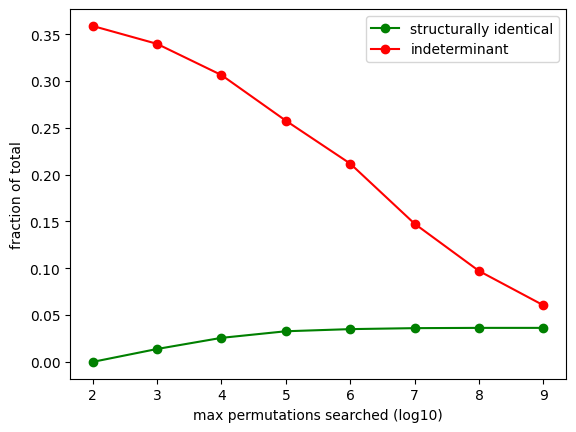

In [45]:
# Effect of max_log_perm on June_10_B_10507
num_duplicates = [0, 145, 270, 344, 368, 379, 382, 382]
num_indeterminants = [3770, 3569, 3219, 2707, 2225, 1550, 1020, 635]
exps = [2, 3, 4, 5, 6, 7, 8, 9]
plt.plot(exps, num_duplicates/total, color="g", marker="o")
plt.plot(exps, num_indeterminants/total, color="r", marker="o")
plt.ylabel("fraction of total")
plt.xlabel("max permutations searched (log10)")
plt.legend(["structurally identical", "indeterminant"])

In [ ]:
## Histogram of directory frac duplicates, frac indeterminant

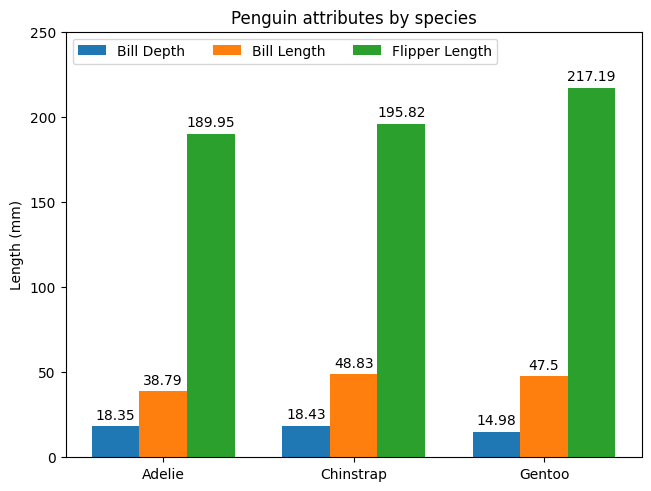

In [60]:

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

In [44]:
ANTIMONY_STRS = []
for ffile in STRUCTURALLY_IDENTICAL_FILES:
    path = os.path.join(DIRECTORY, ffile)
    with open(path, "r") as fd:
        antimony_str = fd.readlines()
        ANTIMONY_STRS.append(antimony_str)
        rr = te.loada("".join(antimony_str))
    print(f'\n\n***{ffile}***')
    print("".join(antimony_str))
    print(rr.getFullStoichiometryMatrix())



***bestmodel_ZKtQg5szoAUk***
S2 -> S1 + S2; k1*S2
S2 -> S2 + S2; k2*S2
S0 + S1 -> S0; k3*S0*S1
S1 + S2 -> S1; k4*S1*S2
k1 = 269.34707587541277
k2 = 60.25478099219909
k3 = 9.708813759773985
k4 = 2.6580339984035137
S0 = 1.0
S1 = 5.0
S2 = 9.0

#fitness: 0.010533933868100998
      _J0, _J1, _J2, _J3
S2 [[   0,   1,   0,  -1],
S1  [   1,   0,  -1,   0],
S0  [   0,   0,   0,   0]]



***bestmodel_lTR7BUrpcTAy***
S2 -> S1 + S2; k1*S2
S1 -> S1 + S2; k2*S1
S1 + S2 -> S1; k3*S1*S2
S0 + S1 -> S0; k4*S0*S1
k1 = 134.85391054518985
k2 = 0.2618898320507899
k3 = 0.6839573639615687
k4 = 10.216160875415516
S0 = 1.0
S1 = 5.0
S2 = 9.0

#fitness: 0.009368601631562357
      _J0, _J1, _J2, _J3
S2 [[   0,   1,  -1,   0],
S1  [   1,   0,   0,  -1],
S0  [   0,   0,   0,   0]]



***bestmodel_Y4fPEi7PvO0w***
S2 -> S1 + S2; k1*S2
S2 -> S2 + S2; k2*S2
S0 + S1 -> S0; k3*S0*S1
S1 + S2 -> S1; k4*S1*S2
k1 = 601.4930899862853
k2 = 40.13089354097397
k3 = 13.250842257269145
k4 = 1.573007505680502
S0 = 1.0
S1 = 5.0
S2 =

In [28]:
ffile

'bestmodel_4XpqKkCsNTOk'

In [26]:
! ls /Users/jlheller/home/Technical/repos/OscillatorDatabase


LICENSE                         Oscillators_June_11_10160
Oscillators_DOE_June_10_17565   Oscillators_June_11_A_2024_6877
Oscillators_DOE_June_12_A_30917 Oscillators_June_11_B_2024_7809
Oscillators_DOE_June_12_B_41373 Oscillators_June_12_2024_8193
Oscillators_DOE_June_12_C_27662 Oscillators_June_9_2024_14948
Oscillators_June_10_A_11515     Oscillators_May_28_2024_8898
Oscillators_June_10_B_10507     README.md


In [25]:
! ls /Users/jlheller/home/Technical/repos/OscillatorDatabase/Oscillators_June_9_2024_18070


ls: /Users/jlheller/home/Technical/repos/OscillatorDatabase/Oscillators_June_9_2024_18070: No such file or directory
